# TTC Subway Delays — EDA Notebook
_Interactive exploration with Plotly_  

This notebook explores TTC subway delay data with a focus on:
- System-level trends
- Line-level trends (BD, YU, SHP)
- Rush-hour vs Off-peak patterns
- Seasonal variation
- Station-level insights

> Tip: Run cells top-to-bottom on first use.


In [1]:
# --- Imports & Setup ---
import sys, os
sys.path.append(os.path.abspath(".."))  # add project root
from utils.ttc_loader import TTCLoader
import eda_plots as eda
import plotly.io as pio

## Load Data

In [2]:
# --- Load your dataset here ---
loader = TTCLoader()
df = loader.df
df.head()


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station Category,DateTime,IsWeekday,Rush Hour,Season,Delay Category,Delay Description
0,2018-01-01,00:29:00,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986,Passenger,2018-01-01 00:29:00,True,Off peak,Winter,Mechanical/Infrastructure,ATC PROJECT
1,2018-01-01,01:39:00,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781,Passenger,2018-01-01 01:39:00,True,Off peak,Winter,Unknown,MISCELLANEOUS OTHER
2,2018-01-01,02:09:00,Monday,KIPLING STATION,MUSAN,3,7,E,BD,5261,Passenger,2018-01-01 02:09:00,True,Off peak,Winter,Patron,UNSANITARY VEHICLE
3,2018-01-01,02:42:00,Monday,COLLEGE STATION,SUDP,7,12,N,YU,5696,Passenger,2018-01-01 02:42:00,True,Off peak,Winter,Patron,DISORDERLY PATRON
4,2018-01-01,03:06:00,Monday,WARDEN STATION,MUI,3,7,E,BD,5257,Passenger,2018-01-01 03:06:00,True,Off peak,Winter,Patron,INJURED/ILL CUSTOMER ON TRAIN TRANSPORTED


## 1) System-Wide Trends

#### Has the delays increased over the years?

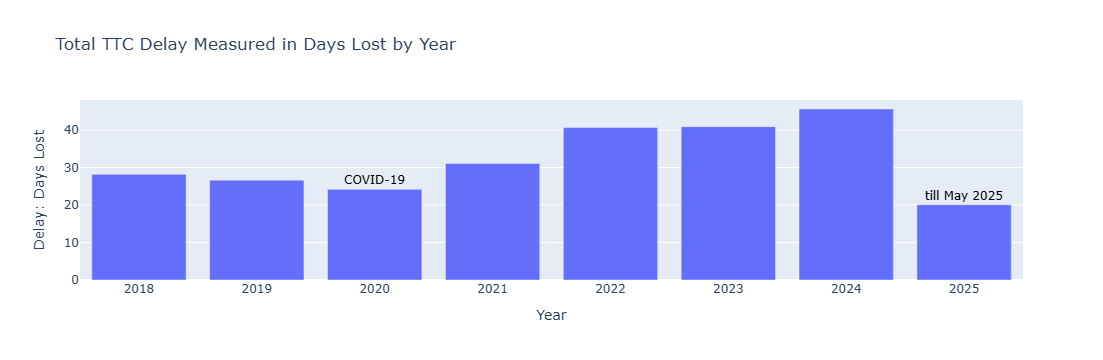

In [3]:
fig= eda.plot_total_delay_by_year(df, unit = "days")
fig.show()


## 2) Spatial and Temporal Patterns Analysis


#### Which subway lines are most delay-prone


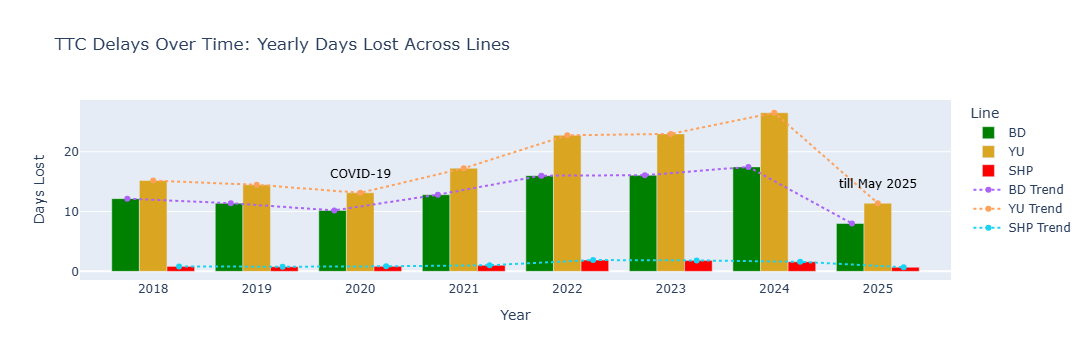

In [4]:
fig= eda.plot_line_trends_by_year(df, unit = "days")
fig.show()


#### Which subway stations are consistently in the Top 10 delay prone stations in the last 3 years

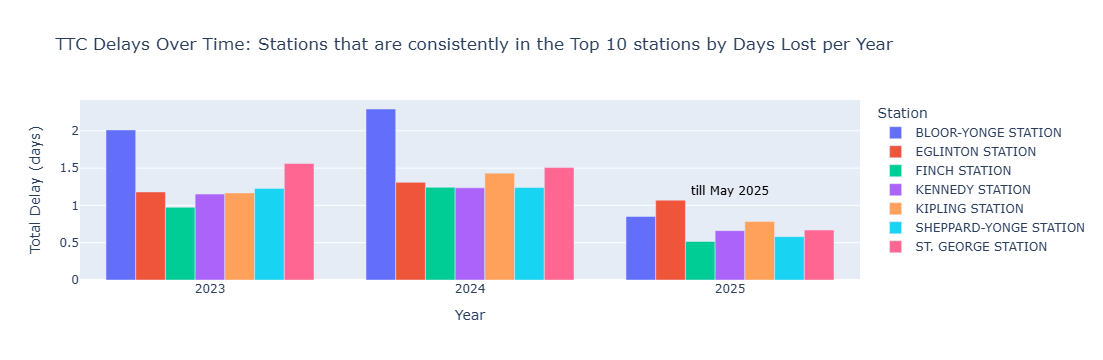

In [5]:
fig= eda.plot_consistently_top_station_trend(df, unit = "days", top_n = 10, last_n_years = 3)
fig.show()


#### When do delays occur most often - during peak or off-peak hours

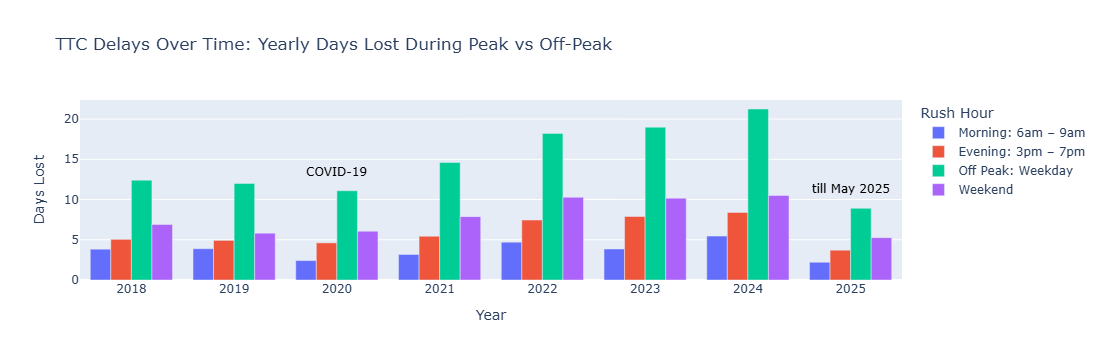

In [6]:
fig= eda.plot_rush_hour_trends_by_year(df, unit = "days")
fig.show()


#### Which season has the most delays

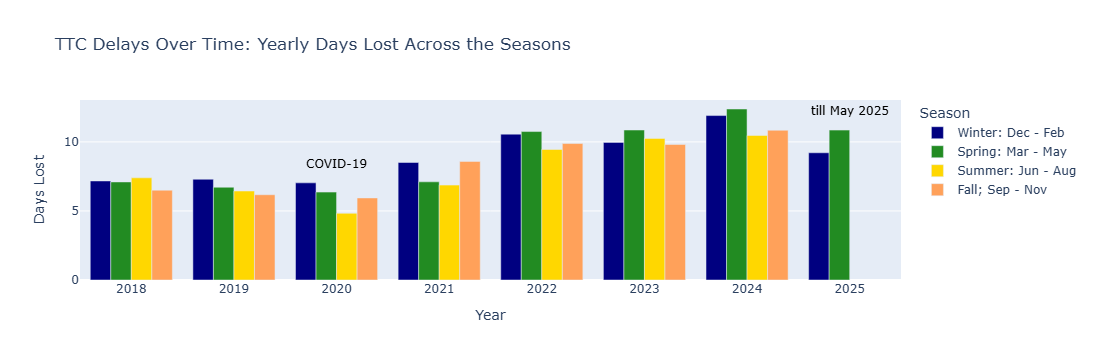

In [7]:
fig= eda.plot_season_trends_by_year(df, unit = "days")
fig.show()

#### Have major delays (>=20) been increasing in occurance? 

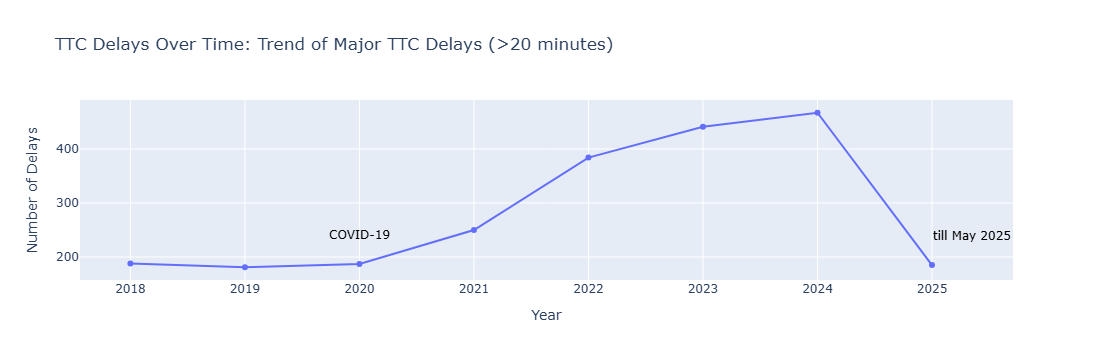

In [8]:
fig= eda.plot_major_delay_trend(df)
fig.show()

#### Have minor delays (< 20 min) been increasing in occurance? 

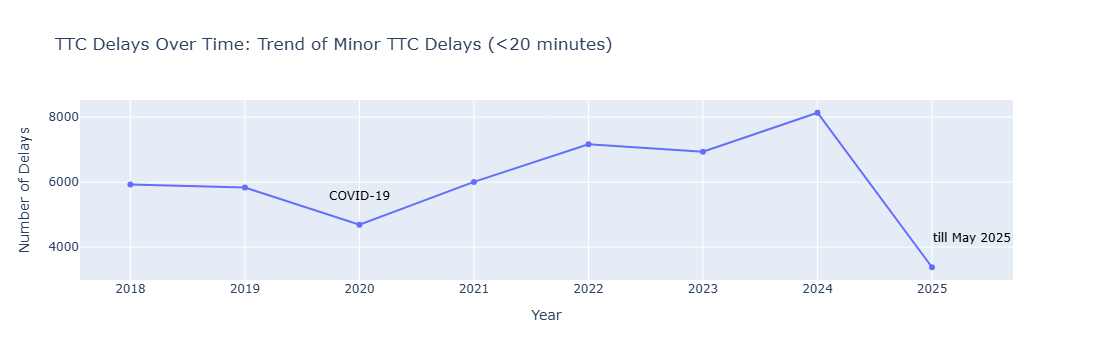

In [9]:
fig= eda.plot_minor_delay_trend(df)
fig.show()